# Advertisment Clicking Prediction

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading csv File**

In [2]:
ad_data=pd.read_csv("advertising.csv");

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** info and describe() on ad_data**

In [4]:
ad_data.drop(['City'],axis=1,inplace=True)

In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

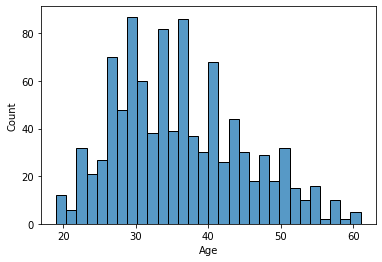

In [6]:
sns.histplot(ad_data['Age'],bins=30)

**A jointplot showing Area Income versus Age.**

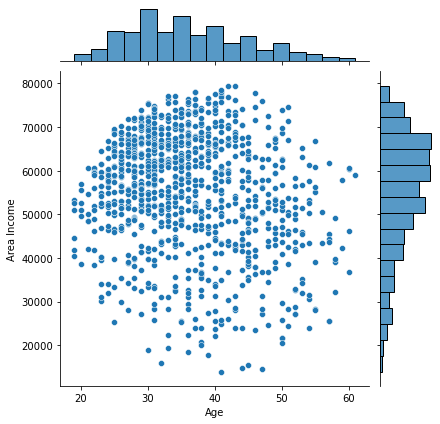

In [7]:
sns.jointplot(y=ad_data['Area Income'],x=ad_data['Age'])

**A jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

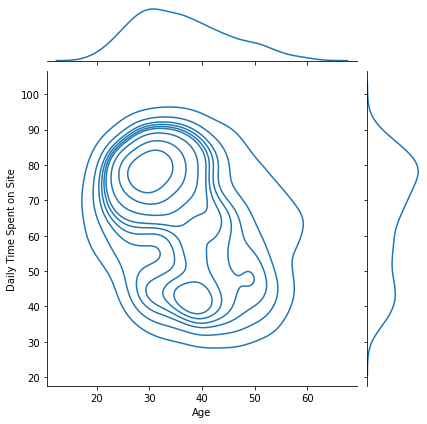

In [8]:
sns.jointplot(x=ad_data['Age'],y=ad_data['Daily Time Spent on Site'],kind='kde')

** A jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

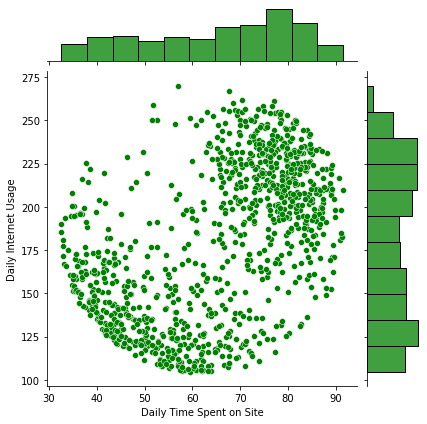

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

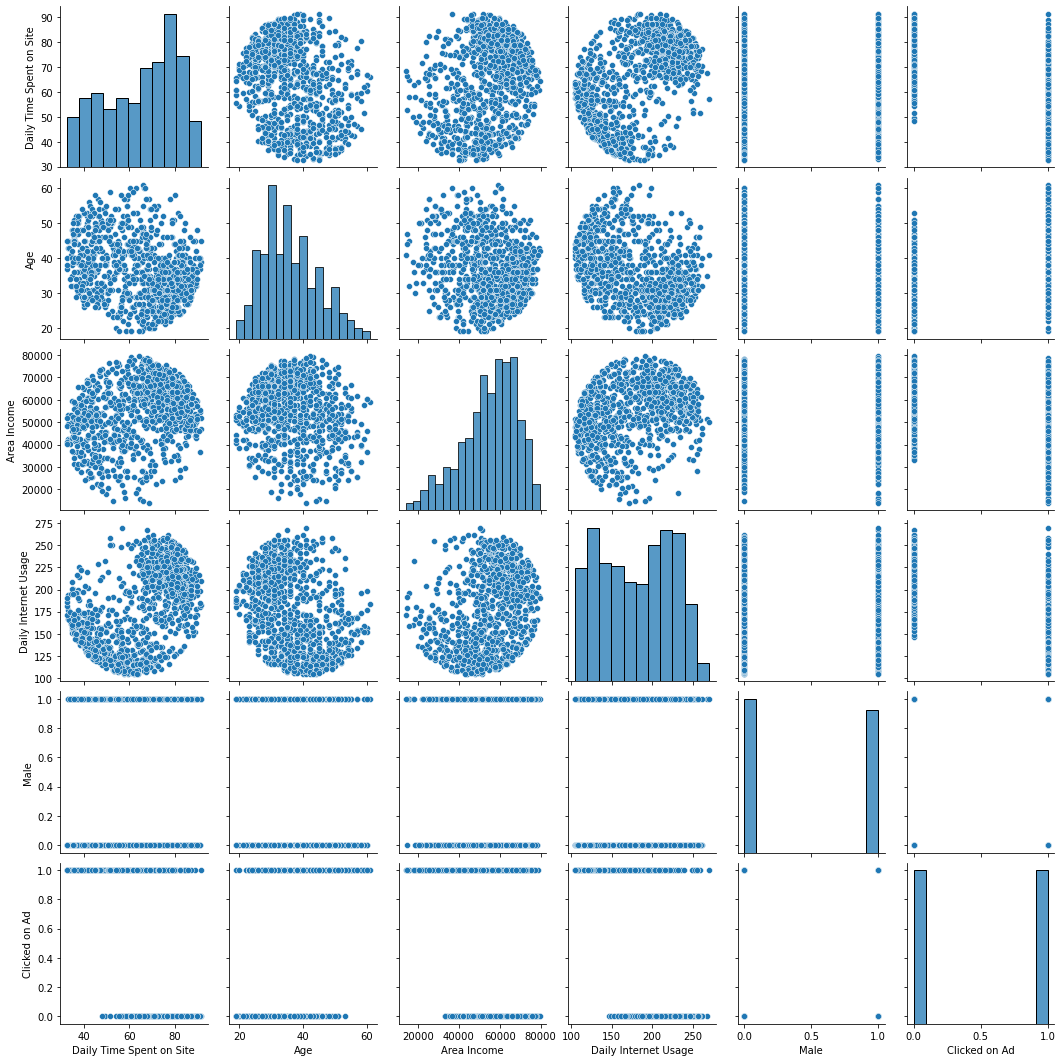

In [10]:
sns.pairplot(data=ad_data)

# Logistic Regression

** Split the data into training set and testing set using train_test_split**

In [11]:
X=ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]
Y=ad_data['Clicked on Ad']
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

** Train and fit a logistic regression model on the training set.**

In [22]:
logmodel = LogisticRegression()

In [23]:
logmodel.fit(X_train,Y_train)

LogisticRegression()

## Predictions and Evaluations

In [24]:
predictdata=logmodel.predict(X_test)
print(predictdata)

[0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0]


** A classification report for the model.**

In [25]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(Y_test,predictdata))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

